# Sampled Gromov Wasserstein

- This notebook summarises the code of the paper Sampled Gromov Wasserstein accepted at the Journal Track of ECML-PKDD 2021 and allows to reproduce every tables and figures in the paper and in the supplementary material. An open source version is available at https://hal.archives-ouvertes.fr/hal-03232509/document.
- To allow further reuse, we plan to integrate it into the **POT library** (https://pythonot.github.io/) very soon, check the latest POT library version if you want to use the algorithm and do not care about reproducing the experiments of this paper.
- Do not hesitate to send a mail if you have any questions about the code or the paper : tanguy.kerdoncuff@laposte.net

# Code comments

The option "-s" allows to save the results of different runs. As everything as already been saved we do not use this option. The corresponding notation between the paper and the name of the algorithm used are:
- SaGroW = sampled_gromov_e_constant
- PoGroW = sampled_gromov_sliced
- EGW = e_gromov
- EGW$^{KL}$ = e_gromov_KL
- EMD-GW = gromov
- S-GWL = S_GWL
- SGW = sliced_gromov

# First test to see if the methods are working

In [8]:
!python main_comparaison.py --n_samples_s 100 --loss_func_name 1_loss --name_algo sampled_gromov_e_constant --name_dataset gaussian_point_graph --n_iter_algo 1

Namespace(KL=1, T_is_sparse=False, alpha_experiment=False, barycenter=False, batch_size=None, clique_size_s=50, clique_size_t=50, constraint=True, cross_val=False, dimension=2, dimension_s=20, dimension_t=10, enough_space=True, entropy_experiment=False, epsilon=1.0, epsilon_min=0.0, from_graphs='', iter_epsilon=1000, iter_max=1, learning_step=0.8, loss_func_name='1_loss', n_iter_algo=1, n_neighbors=5, n_samples_s=100, n_samples_t=100, name_algo='sampled_gromov_e_constant', name_dataset='gaussian_point_graph', nb_iter_batch=1, nb_iter_update_Y=400, noise_graph=0.1, p_in_s=0.5, p_in_t=0.5, param1='', param2='', pickle_name='', pickle_path='pickle_compare', plot=False, ps_out_s=0.1, ps_out_t=0.1, rdm_seed=12345, repeat=True, same_space=False, save_pickle=False, sparse_graph=True, to_graphs='', value_graph=True, variance_s=5, variance_t=5, verbose=False)
Mean Wasserstein distance 216.69561609687395
Mean Wasserstein distance approximated 216.70651108481158
Mean computational time for findin

In [9]:
!python main_comparaison.py --n_samples_s 100 --loss_func_name 1_loss --name_algo sampled_gromov_sliced --name_dataset gaussian_point_graph --n_iter_algo 1

Namespace(KL=1, T_is_sparse=False, alpha_experiment=False, barycenter=False, batch_size=None, clique_size_s=50, clique_size_t=50, constraint=True, cross_val=False, dimension=2, dimension_s=20, dimension_t=10, enough_space=True, entropy_experiment=False, epsilon=1.0, epsilon_min=0.0, from_graphs='', iter_epsilon=1000, iter_max=1, learning_step=0.8, loss_func_name='1_loss', n_iter_algo=1, n_neighbors=5, n_samples_s=100, n_samples_t=100, name_algo='sampled_gromov_sliced', name_dataset='gaussian_point_graph', nb_iter_batch=1, nb_iter_update_Y=400, noise_graph=0.1, p_in_s=0.5, p_in_t=0.5, param1='', param2='', pickle_name='', pickle_path='pickle_compare', plot=False, ps_out_s=0.1, ps_out_t=0.1, rdm_seed=12345, repeat=True, same_space=False, save_pickle=False, sparse_graph=True, to_graphs='', value_graph=True, variance_s=5, variance_t=5, verbose=False)
Point Gromov
Mean Wasserstein distance 223.26420787066286
Mean Wasserstein distance approximated 223.234317710457
Mean computational time for

In [10]:
!python main_comparaison.py --n_samples_s 100 --loss_func_name 1_loss --name_algo e_gromov --name_dataset gaussian_point_graph --n_iter_algo 1

Namespace(KL=1, T_is_sparse=False, alpha_experiment=False, barycenter=False, batch_size=None, clique_size_s=50, clique_size_t=50, constraint=True, cross_val=False, dimension=2, dimension_s=20, dimension_t=10, enough_space=True, entropy_experiment=False, epsilon=1.0, epsilon_min=0.0, from_graphs='', iter_epsilon=1000, iter_max=1, learning_step=0.8, loss_func_name='1_loss', n_iter_algo=1, n_neighbors=5, n_samples_s=100, n_samples_t=100, name_algo='e_gromov', name_dataset='gaussian_point_graph', nb_iter_batch=1, nb_iter_update_Y=400, noise_graph=0.1, p_in_s=0.5, p_in_t=0.5, param1='', param2='', pickle_name='', pickle_path='pickle_compare', plot=False, ps_out_s=0.1, ps_out_t=0.1, rdm_seed=12345, repeat=True, same_space=False, save_pickle=False, sparse_graph=True, to_graphs='', value_graph=True, variance_s=5, variance_t=5, verbose=False)
Mean Wasserstein distance 240.72013604550287
Mean Wasserstein distance approximated 240.72013604550287
Mean computational time for finding T 5.40724015235

# Main comparaison

For the main experiment, you need to run the command above for each algorithms (name_algo), each of the two datasets (name_dataset) with n_iter_algo = 10 and potentialy different value of parameters depending on the algorithm.
- SaGroW will depend mainly on the number of samples and iterations
- PoGroW mainly depends on the number of iterations
- EGW, EGW$_{KL}$ and S_GWL mainly depend on the entropy term

We provide a bash-like pseudo code example to run on a cluster to save all the files into the folder "pickle_compare".

In [ ]:
for n in 20 50 100:
    for d in gaussian_point_graph gaussian_graph
        for m in 1 10 100 1000
            for i in 10 50 100 500 1000
                !python main_experiment.py -s --n_samples_s $n --loss_func_name 1_loss --name_algo sampled_gromov_no_KL_e_constant --pickle_name 5 --batch_size $m --iter_epsilon $i --param1 $m --param2 $i

The "pickle_name" parameter is here to avoid deleting existing files by adding a different value each time.
The "param1" and "param2" parameters are essential to save at differente locations for each set of hyperparameter.

### Results

If all the experiments as been runed, we can visualize them.

Using the parameter "paper plot", only the best hyperparameters are selected. The first plot shows the time for computing the transport plan T and the time needed to compute the distance with the complete (and slow) method.

In [6]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import main_comparaison
import numpy as np
import tikzplotlib
@interact
def plot_widgets(sampled_gromov_e_constant=True,
                 sampled_gromov_no_KL_e_constant=False,
                 sampled_gromov_sliced=True,
                 sliced_gromov=True,
                 identity=True,
                 S_GWL=True,
                 gromov=True,
                 e_gromov=True,
                 e_gromov_KL=True,
                 uniform=True,
                 entropy=[[0.001, 0.005, 0.01, 0.05, 0.1], [0.001], [0.005], [0.01], [0.05], [0.1]],
                 entropy_SGWL=[[0.01, 0.1, 1, 10, 100], [0.01], [0.1], [1], [10], [100]],
                 iteration=[[10, 50, 100, 500, 1000], [10], [50], [100], [500], [1000]],
                 batchsize=[[1, 10, 100, 1000], [1], [10], [100], [1000]],
                 max_n_samples=10000,
                 pickle_name=[""],
                 name_dataset=["gaussian_point_graph", "gaussian_graph"],
                 log_scale=True,
                 figsize1=8,
                 figsize2=5,
                 loss_func_name=["1_loss", "square_loss"],
                 save=False,
                 paper_plot=True,
                show_legend=True):
    names_algo = []
    names_algo_legend = []
    if e_gromov:
        names_algo.append("e_gromov")
        names_algo_legend.append("EGW")
    if e_gromov_KL:
        names_algo.append("e_gromov_KL")
        names_algo_legend.append("EGW$^{KL}$")
    if gromov:
        names_algo.append("gromov")
        names_algo_legend.append("EMD-GW")
    if S_GWL:
        names_algo.append("S_GWL")
        names_algo_legend.append("S-GWL")
    if sampled_gromov_e_constant:
        names_algo.append("sampled_gromov_e_constant")
        names_algo_legend.append("$SaGroW^{KL}$")
    if sampled_gromov_no_KL_e_constant:
        names_algo.append("sampled_gromov_no_KL_e_constant")
        names_algo_legend.append("$SaGroW$")
    if sampled_gromov_sliced:
        names_algo.append("sampled_gromov_sliced")
        names_algo_legend.append("PoGroW")
    if sliced_gromov:
        names_algo.append("sliced_gromov")
        names_algo_legend.append("SGW")
    if uniform:
        names_algo.append("uniform")
        names_algo_legend.append("Uniform")
    if identity:
        names_algo.append("identity")
        names_algo_legend.append("Identity")
    n_samples = np.array([20, 50, 100, 200, 500, 1000, 1500, 2000, 5000, 10000])
    n_samples = n_samples[n_samples <= max_n_samples]

    if not pickle_name:
        if name_dataset == "same_graph":
            pickle_name = "same"
        else:
            pickle_name = "_2"
    main_comparaison.analyse_data_hyper(names_algo=names_algo,
                                        names_algo_legend=names_algo_legend,
                                        n_samples_s=list(n_samples),
                                        pickle_name=pickle_name,
                                        name_dataset=name_dataset,
                                        log_scale=log_scale,
                                        figsize=(figsize1, figsize2),
                                        save=save,
                                        loss_func_name=loss_func_name,
                                        entropy=entropy,
                                        entropy_SGWL=entropy_SGWL,
                                        batchsize=batchsize,
                                        iteration=iteration,
                                        paper_plot=paper_plot,
                                       show_legend=show_legend,
                                       linestyle="-")

interactive(children=(Checkbox(value=True, description='sampled_gromov_e_constant'), Checkbox(value=False, des…

# Hyperparameters analysis

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import main_comparaison
import numpy as np
import tikzplotlib
@interact
def plot_widgets(sampled_gromov_e_constant=True,
                 sampled_gromov_no_KL_e_constant=False, # Same as sliced
                 sampled_gromov_sliced=True,
                 sliced_gromov=True,
                 identity=True,
                 S_GWL=True,
                 gromov=True,
                 e_gromov=True,
                 e_gromov_KL=True,
                 uniform=True,
                 entropy=[[0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100],
                          [0.001, 0.005, 0.01, 0.05, 0.1],
                          [0.005, 0.01, 0.05, 0.1, 1, 10, 100]],
                 iteration=[[10, 50, 100, 500], [10, 50, 100, 500, 1000], [10, 50, 500], [10, 100, 500],
                            [10], [50], [100], [500], [1000]],
                 batchsize=[[1, 100, 1000], [1, 10, 100, 1000],  [1, 10, 1000], [1], [10], [100], [1000]],
                 n_samples=[500, 20,50,100,200,500,1000,2000,5000,10000],
                 pickle_name=[""],
                 name_dataset=["gaussian_point_graph", "gaussian_graph"],
                 log_scale=True,
                 figsize1=11,
                 figsize2=5,
                 loss_func_name=["1_loss", "square_loss"],
                 save=False,
                 min_plot=False,
                 only_PGW=True,
                 final_plot=True,
                 which_plot=2):
    names_algo = []
    names_algo_legend = []
    if sampled_gromov_e_constant:
        names_algo.append("sampled_gromov_e_constant")
        names_algo_legend.append("$SaGroW^{KL}$")
    if sampled_gromov_no_KL_e_constant:
        names_algo.append("sampled_gromov_no_KL_e_constant")
        names_algo_legend.append("$SaGroW$")
    if sampled_gromov_sliced:
        names_algo.append("sampled_gromov_sliced")
        names_algo_legend.append("PoGroW")
    if gromov:
        names_algo.append("gromov")
        names_algo_legend.append("$EMD-GW$")
    if S_GWL:
        names_algo.append("S_GWL")
        names_algo_legend.append("$S-GWL$")
    if e_gromov:
        names_algo.append("e_gromov")
        names_algo_legend.append("$EGW_\\epsilon$")
    if e_gromov_KL:
        names_algo.append("e_gromov_KL")
        names_algo_legend.append("$EGW^{KL}$")
    if sliced_gromov:
        names_algo.append("sliced_gromov")
        names_algo_legend.append("Sliced GW")
    if uniform:
        names_algo.append("uniform")
        names_algo_legend.append("Uniform")
    if identity:
        names_algo.append("identity")
        names_algo_legend.append("Identity")
    
    n_samples = np.array(n_samples)

    if not pickle_name:
        if name_dataset == "same_graph":
            pickle_name = "same"
        else:
            pickle_name = "_2"
    main_comparaison.hyperparameter_analysis_3(names_algo=names_algo,
                                        names_algo_legend=names_algo_legend,
                                        n_samples_s=n_samples,
                                        pickle_name=pickle_name,
                                        name_dataset=name_dataset,
                                        log_scale=log_scale,
                                        figsize=(figsize1, figsize2),
                                        save=save,
                                        loss_func_name=loss_func_name,
                                        entropy=entropy,
                                        batchsize=batchsize,
                                        iteration=iteration,
                                            min_plot=min_plot,
                                            only_PGW=only_PGW,
                                            final_plot=final_plot,
                                              which_plot=which_plot)

interactive(children=(Checkbox(value=True, description='sampled_gromov_e_constant'), Checkbox(value=False, des…

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import main_comparaison
import numpy as np
import tikzplotlib
@interact
def plot_widgets(sampled_gromov_e_constant=True,
                 sampled_gromov_no_KL_e_constant=False,
                 sampled_gromov_sliced=True,
                 sliced_gromov=True,
                 identity=True,
                 S_GWL=True,
                 gromov=True,
                 e_gromov=True,
                 e_gromov_KL=True,
                 uniform=True,
                 entropy=[[0.001, 0.005, 0.01, 0.05, 0.1, 1, 10, 100],
                          [0.001, 0.005, 0.01, 0.05, 0.1],
                          [0.005, 0.01, 0.05, 0.1, 1, 10, 100]],
                 iteration=[[10, 50, 100, 500], [10, 50, 100, 500, 1000], 
                            [10], [50], [100], [500], [1000]],
                 batchsize=[[1, 10, 100, 1000], [1], [10], [100], [1000]],
                 n_samples=[500, 20,50,100,200,500,1000,2000,5000,10000],
                 pickle_name=[""],
                 name_dataset=["gaussian_point_graph", "gaussian_graph"],
                 log_scale=True,
                 figsize1=11,
                 figsize2=5,
                 loss_func_name=["1_loss", "square_loss"],
                 save=False,
                 min_plot=False,
                only_PGW=True,
                final_plot=True):
    names_algo = []
    names_algo_legend = []
    if sampled_gromov_e_constant:
        names_algo.append("sampled_gromov_e_constant")
        names_algo_legend.append("$SaGroW^{KL}$")
    if sampled_gromov_no_KL_e_constant:
        names_algo.append("sampled_gromov_no_KL_e_constant")
        names_algo_legend.append("$SaGroW$")
    if sampled_gromov_sliced:
        names_algo.append("sampled_gromov_sliced")
        names_algo_legend.append("PoGroW")
    if gromov:
        names_algo.append("gromov")
        names_algo_legend.append("$EMD-GW$")
    if S_GWL:
        names_algo.append("S_GWL")
        names_algo_legend.append("$S-GWL$")
    if e_gromov:
        names_algo.append("e_gromov")
        names_algo_legend.append("$EGW_\\epsilon$")
    if e_gromov_KL:
        names_algo.append("e_gromov_KL")
        names_algo_legend.append("$EGW^{KL}$")
    if sliced_gromov:
        names_algo.append("sliced_gromov")
        names_algo_legend.append("Sliced GW")
    if uniform:
        names_algo.append("uniform")
        names_algo_legend.append("Uniform")
    if identity:
        names_algo.append("identity")
        names_algo_legend.append("Identity")
    n_samples = np.array(n_samples)

    if not pickle_name:
        if name_dataset == "same_graph":
            pickle_name = "same"
        else:
            pickle_name = "_2"
    main_comparaison.hyperparameter_analysis(names_algo=names_algo,
                                        names_algo_legend=names_algo_legend,
                                        n_samples_s=n_samples,
                                        pickle_name=pickle_name,
                                        name_dataset=name_dataset,
                                        log_scale=log_scale,
                                        figsize=(figsize1, figsize2),
                                        save=save,
                                        loss_func_name=loss_func_name,
                                        entropy=entropy,
                                        batchsize=batchsize,
                                        iteration=iteration,
                                            min_plot=min_plot,
                                            only_PGW=only_PGW,
                                            final_plot=final_plot)

interactive(children=(Checkbox(value=True, description='sampled_gromov_e_constant'), Checkbox(value=False, des…

# Distance Comparaison

## Number of point

In [ ]:
!python distance_comparaison.py --points=10,20,50,100,200,500 # ,1000,2000

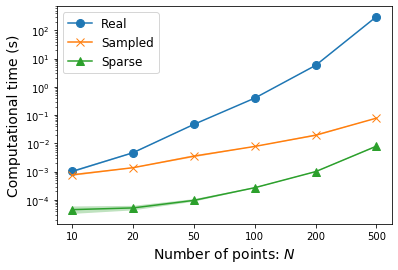

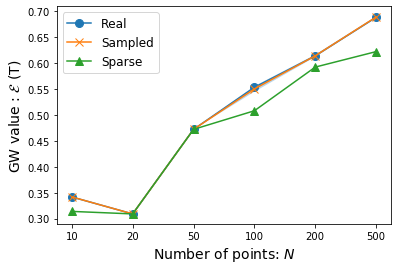

In [1]:
import distance_comparaison 
distance_comparaison.plot(entropy=False,
                          epsilon_range=[10,20,50,100,200,500],
                          figsize1=6,
                          figsize2=4)

## Entropy

In [ ]:
!python distance_comparaison.py -e

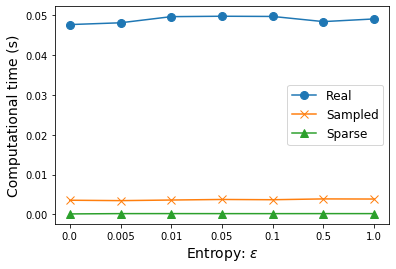

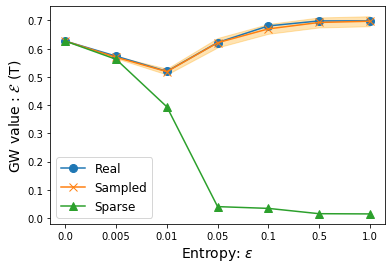

In [1]:
import distance_comparaison
distance_comparaison.plot(entropy=True, figsize1=6, figsize2=4)

# Graph real experiment

The first run should take a long time as the dataset is preprocessed and saved in "./DATA/FIRSTMM_DB/C_label.pickle". This file is too big to be provided in the repository.
The code can be easily parallelized even for one method, with the "--from_graphs 0,9 --to_graphs 0,9" command. This will only compute 100 distances.

To use different hyperparameters for one method, the command "--pickle_name differente_name_each_time" should be used to save in different location.

In [ ]:
!python main_comparaison.py --loss_func_name square_loss --name_algo uniform --name_dataset DB --n_iter_algo 1 --from_graphs 0,41 --to_graphs 0,41

The command "-c" do not really cross validate the data, but only compute the mean distance, time and accuracy with a 1-KNN.

In [ ]:
!python main_comparaison.py -c --loss_func_name square_loss --name_algo uniform --name_dataset DB --from_graphs 0,41 --to_graphs 0,41

All the methods are shown excepts for the exponential square loss, which crash (0 GW distance) due to bad choice of "standard deviation" to normalized the square. To stay fair with the other methods, we do not run again with other hyperparameters. We are however still confidente that this loss can make sens in some datasets.

In [1]:
import main_comparaison
main_comparaison.analyse_classif(name_dataset="DB")

\begin{table*}
\begin{tabular}{llll}
\toprule
                    Dataset &   Train & Distance &    Time \\
\midrule
      \ScalableGW$_{0.005}$ &   $0.1$ &    $400$ &  $14.7$ \\
       \ScalableGW$_{0.01}$ &   $0.1$ &    $400$ &  $13.9$ \\
       \ScalableGW$_{0.05}$ &   $0.1$ &    $400$ &  $13.9$ \\
        \ScalableGW$_{0.1}$ &   $0.1$ &    $400$ &  $12.6$ \\
        \ScalableGW$_{0.5}$ &  $0.17$ &    $390$ &  $12.0$ \\
        \ScalableGW$_{100}$ &  $0.39$ &    $372$ &  $33.2$ \\
         \ScalableGW$_{10}$ &  $0.41$ &    $377$ &  $27.8$ \\
          \ScalableGW$_{1}$ &  $0.29$ &    $374$ &  $11.0$ \\
         \ScalableGW$_{50}$ &  $0.41$ &    $374$ &  $34.1$ \\
          \ScalableGW$_{5}$ &  $0.44$ &    $362$ &  $23.4$ \\
               \EGW{0.0001} &  $0.07$ &    $430$ &   $0.1$ \\
               \EGW{0.0005} &  $0.07$ &    $429$ &   $4.5$ \\
                \EGW{0.001} &  $0.22$ &    $412$ &  $36.2$ \\
                \EGW{0.005} &  $0.22$ &    $375$ &  $42.6$ \\
               

# Small experiment for different value of entropy

Run the following line to get the latex table bellow (lot of useless comment will be display).

In [ ]:
!python main_comparaison.py -entropy --n_samples_s 50 --loss_func_name 1_loss --name_algo sampled_gromov_e_constant --name_dataset gaussian_graph --n_iter_algo 10 --iter_epsilon 1000 --epsilon 1

In [ ]:
\begin{table*}
\begin{tabular}{lrr}
\toprule
epsilon &   SGW &   EGW \\
\midrule
  0.001 &  0.73 &  0.75 \\
  0.005 &  0.59 &  0.63 \\
   0.01 &  0.55 &  0.62 \\
   0.05 &  0.51 &  0.67 \\
    0.1 &  0.51 &  0.71 \\
    0.5 &  0.52 &  0.75 \\
      1 &  0.52 &  0.75 \\
      5 &  0.62 &  0.75 \\
     10 &  0.68 &  0.75 \\
\bottomrule
\end{tabular}

\end{table*}

# Small experiment for different value of alpha

Run the following lines to get the latex tables bellow (lot of useless comment will be display).

In [ ]:
!python main_comparaison.py -alpha --n_samples_s 50 --loss_func_name 1_loss --name_algo sampled_gromov_sliced --name_dataset gaussian_graph --n_iter_algo 1 --iter_epsilon 1000 --epsilon 1

In [ ]:
\begin{table*}
\begin{tabular}{rrrrrrrrrrr}
\toprule
 Number Iterations &  0.001 &   0.01 &    0.1 &   0.25 &    0.5 &   0.75 &    0.9 &   0.99 &  0.999 &      1 \\
\midrule
                 1 &  74.87 &  74.87 &  74.82 &  74.63 &  74.03 &  73.07 &  72.33 &  71.82 &  71.77 &  71.76 \\
                10 &  74.87 &  74.82 &  74.73 &  74.52 &  74.88 &  74.69 &  72.28 &  71.84 &  71.80 &  71.79 \\
               100 &  74.82 &  74.35 &  73.36 &  73.94 &  74.67 &  68.34 &  68.76 &  71.91 &  71.93 &  71.94 \\
              1000 &  74.37 &  73.76 &  72.90 &  73.32 &  73.09 &  72.12 &  70.62 &  72.97 &  73.01 &  70.69 \\
\bottomrule
\end{tabular}

\end{table*}

In [ ]:
!python main_comparaison.py -alpha --n_samples_s 50 --loss_func_name 1_loss --name_algo sampled_gromov_sliced --name_dataset gaussian_point_graph --n_iter_algo 1 --iter_epsilon 1000 --epsilon 1

In [ ]:
\begin{table*}
\begin{tabular}{rrrrrrrrrrr}
\toprule
 Number Iterations &   0.001 &    0.01 &     0.1 &    0.25 &     0.5 &    0.75 &     0.9 &    0.99 &   0.999 &       1 \\
\midrule
                 1 &  166.88 &  166.87 &  166.28 &  163.53 &  154.03 &  138.40 &  126.08 &  117.62 &  116.73 &  116.63 \\
                10 &  166.83 &  166.37 &  163.81 &  160.98 &  117.23 &   85.41 &   85.27 &   85.24 &   79.84 &   79.84 \\
               100 &  166.48 &  163.31 &  105.36 &   90.42 &  137.56 &   76.93 &   79.02 &   73.80 &   73.64 &   73.62 \\
              1000 &  163.38 &  134.57 &   86.59 &   80.47 &   79.43 &   78.28 &   77.45 &   77.14 &   77.11 &   77.11 \\
\bottomrule
\end{tabular}

\end{table*}